In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LSTM, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
from sklearn.metrics import confusion_matrix
import time

In [2]:
# Chargement des données MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Prétraitement pour CNN (format: H, W, C)
X_train_cnn = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test_cnn = X_test.reshape(-1, 28, 28, 1) / 255.0

# Prétraitement pour RNN (format: séquences, features)
X_train_rnn = X_train.reshape(-1, 28, 28) / 255.0
X_test_rnn = X_test.reshape(-1, 28, 28) / 255.0

# Encodage one-hot des labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print(f"Données CNN: {X_train_cnn.shape}")
print(f"Données RNN: {X_train_rnn.shape}")

Données CNN: (60000, 28, 28, 1)
Données RNN: (60000, 28, 28)


In [3]:
def create_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

model_cnn = create_cnn_model()
model_cnn.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model_cnn.summary()

C:\Users\Hanane\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,418 (880.54 KB)

 Trainable params: 225,226 (879.79 KB)

 Non-trainable params: 192 (768.00 B)

In [4]:
def create_rnn_model():
    model = Sequential([
        LSTM(128, return_sequences=True, input_shape=(28, 28)),
        Dropout(0.2),
        LSTM(64, return_sequences=False),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

model_rnn = create_rnn_model()
model_rnn.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model_rnn.summary()

C:\Users\Hanane\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 28, 128)             │          80,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 28, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 139,402 (544.54 KB)

 Trainable params: 139,402 (544.54 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Entraînement CNN
start_time = time.time()
history_cnn = model_cnn.fit(X_train_cnn, y_train_cat, epochs=10, validation_data=(X_test_cnn, y_test_cat), batch_size=128, verbose=1)
train_time_cnn = time.time() - start_time

# Entraînement RNN
start_time = time.time()
history_rnn = model_rnn.fit(X_train_rnn, y_train_cat, epochs=10, validation_data=(X_test_rnn, y_test_cat), batch_size=128, verbose=1)
train_time_rnn = time.time() - start_time

print(f"Temps CNN: {train_time_cnn:.1f}s")
print(f"Temps RNN: {train_time_rnn:.1f}s")

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 64ms/step - accuracy: 0.8637 - loss: 0.4803 - val_accuracy: 0.9385 - val_loss: 0.1843
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 59ms/step - accuracy: 0.9719 - loss: 0.0932 - val_accuracy: 0.9864 - val_loss: 0.0422
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 63ms/step - accuracy: 0.9803 - loss: 0.0656 - val_accuracy: 0.9905 - val_loss: 0.0332
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 64ms/step - accuracy: 0.9844 - loss: 0.0535 - val_accuracy: 0.9897 - val_loss: 0.0312
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 59ms/step - accuracy: 0.9868 - loss: 0.0440 - val_accuracy: 0.9910 - val_loss: 0.0334
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 59ms/step - accuracy: 0.9884 - loss: 0.0374 - val_accuracy: 0.9901 - val_loss: 0.0346
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.9897 - loss: 0.0342 - val_accuracy: 0.9890 - val_loss: 0.0415
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 65ms/step - accuracy: 0.9899 - loss: 0.0314 - 

In [6]:
# Évaluation finale
cnn_loss, cnn_acc = model_cnn.evaluate(X_test_cnn, y_test_cat, verbose=0)
rnn_loss, rnn_acc = model_rnn.evaluate(X_test_rnn, y_test_cat, verbose=0)

print(f"CNN - Précision: {cnn_acc:.4f} ({cnn_acc*100:.2f}%)")
print(f"RNN - Précision: {rnn_acc:.4f} ({rnn_acc*100:.2f}%)")

# Tableau comparatif
print("\n=== COMPARAISON ===")
print(f"{'Métrique':<15} {'CNN':<10} {'RNN':<10}")
print("-" * 35)
print(f"{'Précision (%)':<15} {cnn_acc*100:<10.2f} {rnn_acc*100:<10.2f}")
print(f"{'Temps (s)':<15} {train_time_cnn:<10.1f} {train_time_rnn:<10.1f}")
print(f"{'Paramètres':<15} {model_cnn.count_params():<10} {model_rnn.count_params():<10}")

CNN - Précision: 0.9896 (98.96%)
RNN - Précision: 0.9877 (98.77%)

=== COMPARAISON ===
Métrique        CNN        RNN       
-----------------------------------
Précision (%)   98.96      98.77     
Temps (s)       290.4      252.9     
Paramètres      225418     139402    


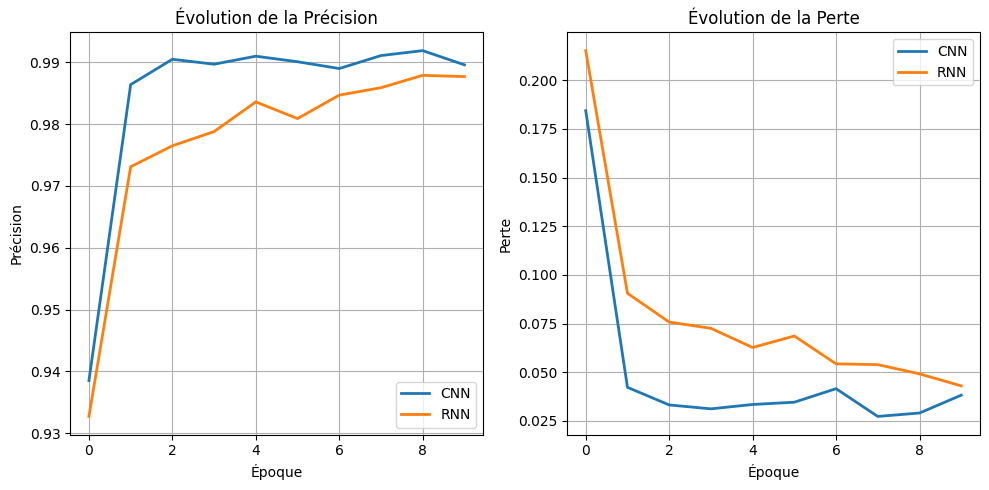

In [8]:
plt.figure(figsize=(10, 5))

# Précision
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['val_accuracy'], label='CNN', linewidth=2)
plt.plot(history_rnn.history['val_accuracy'], label='RNN', linewidth=2)
plt.title('Évolution de la Précision')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.legend()
plt.grid(True)

# Perte
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['val_loss'], label='CNN', linewidth=2)
plt.plot(history_rnn.history['val_loss'], label='RNN', linewidth=2)
plt.title('Évolution de la Perte')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


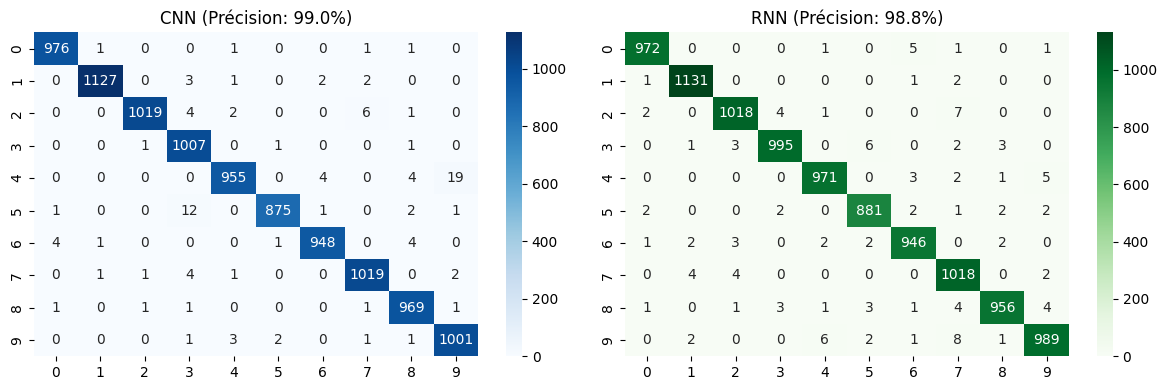

In [9]:
# Prédictions
y_pred_cnn = np.argmax(model_cnn.predict(X_test_cnn), axis=1)
y_pred_rnn = np.argmax(model_rnn.predict(X_test_rnn), axis=1)
y_true = y_test

# Matrices de confusion
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

cm_cnn = confusion_matrix(y_true, y_pred_cnn)
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title(f'CNN (Précision: {cnn_acc*100:.1f}%)')

cm_rnn = confusion_matrix(y_true, y_pred_rnn)
sns.heatmap(cm_rnn, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title(f'RNN (Précision: {rnn_acc*100:.1f}%)')

plt.tight_layout()
plt.show()

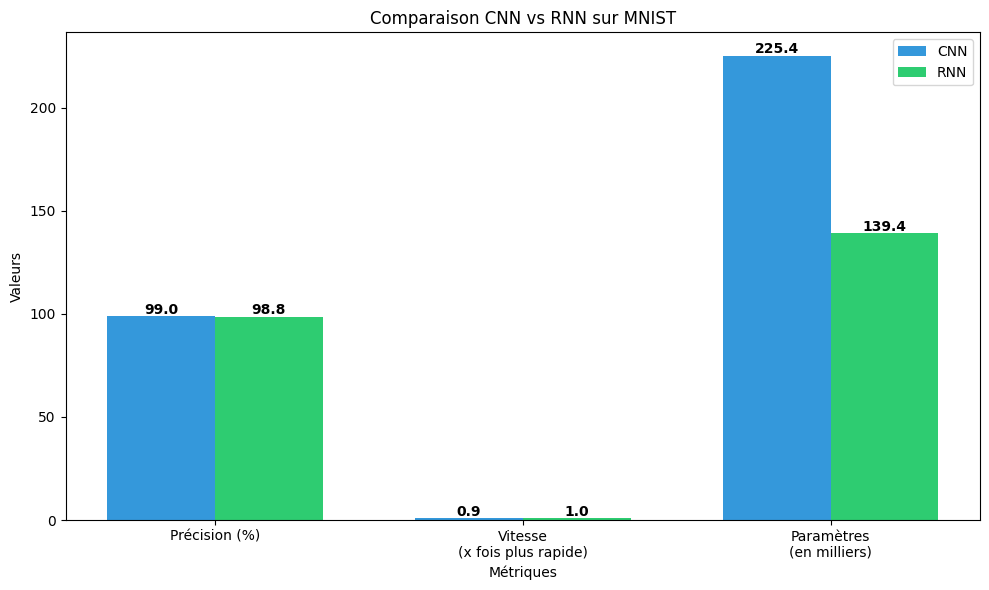

In [10]:
# Graphique à barres comparatif
metrics = ['Précision (%)', 'Vitesse\n(x fois plus rapide)', 'Paramètres\n(en milliers)']
cnn_values = [cnn_acc*100, train_time_rnn/train_time_cnn, model_cnn.count_params()/1000]
rnn_values = [rnn_acc*100, 1, model_rnn.count_params()/1000]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, cnn_values, width, label='CNN', color='#3498db')
bars2 = ax.bar(x + width/2, rnn_values, width, label='RNN', color='#2ecc71')

ax.set_xlabel('Métriques')
ax.set_ylabel('Valeurs')
ax.set_title('Comparaison CNN vs RNN sur MNIST')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Valeurs sur les barres
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    ax.text(bar1.get_x() + bar1.get_width()/2, bar1.get_height() + 1,
            f'{cnn_values[i]:.1f}', ha='center', fontweight='bold')
    ax.text(bar2.get_x() + bar2.get_width()/2, bar2.get_height() + 1,
            f'{rnn_values[i]:.1f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()
